In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('Dataset/Train/Train', target_size=(225, 225), batch_size=32, class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('Dataset/Validation/Validation', target_size=(225, 225), batch_size=32, class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_generator, batch_size=16, epochs=5, validation_data=validation_generator, validation_batch_size=16)

Epoch 1/5
42/42 [==============================] - 151s 3s/step - loss: 1.6268 - accuracy: 0.5144 - val_loss: 0.8842 - val_accuracy: 0.5833
Epoch 2/5
42/42 [==============================] - 134s 3s/step - loss: 0.5641 - accuracy: 0.7542 - val_loss: 0.8768 - val_accuracy: 0.5833
Epoch 3/5
42/42 [==============================] - 134s 3s/step - loss: 0.4256 - accuracy: 0.8434 - val_loss: 0.5780 - val_accuracy: 0.7667
Epoch 4/5
42/42 [==============================] - 144s 3s/step - loss: 0.2767 - accuracy: 0.8979 - val_loss: 0.4287 - val_accuracy: 0.8333
Epoch 5/5
42/42 [==============================] - 145s 3s/step - loss: 0.2189 - accuracy: 0.9281 - val_loss: 0.5291 - val_accuracy: 0.8500


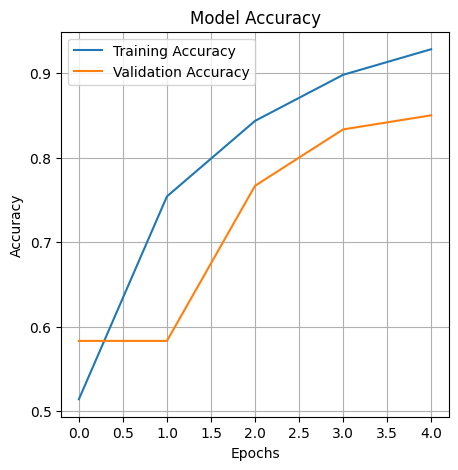

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5), dpi=100)

plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

In [10]:
model.save("plantModel.h5")

In [23]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

def preprocess_image2(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    return x

x = preprocess_image('Dataset/Test/Test/Rust/82f49a4a7b9585f1.jpg')

predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 1s 503ms/step


array([2.1465849e-02, 5.6234876e-05, 9.7847795e-01], dtype=float32)

In [12]:
labels = train_generator.class_indices
labels = {value: key for key, value in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [13]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust


In [14]:
test_generator = test_datagen.flow_from_directory('Dataset/Validation/Validation', target_size=(225, 225), batch_size=32, class_mode='categorical')

Found 60 images belonging to 3 classes.


In [15]:
y_test = test_generator.class_indices
y_test = {value: key for key, value in y_test.items()}
y_test = y_test[np.argmax]

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

In [34]:
import os

def load_data(data_dir):
  
  X = []  
  y = [] 

  for subdir in os.listdir(data_dir):

    subdirectory_path = os.path.join(data_dir, subdir)

    if os.path.isdir(subdirectory_path):

      label = 0
      
      if (subdir == "Healthy"):
        label = 0
      elif (subdir == "Powdery"):
        label = 1
      elif (subdir == "Rust"):
        label = 2

      for filename in os.listdir(subdirectory_path):

        image_path = os.path.join(subdirectory_path, filename)

        image = preprocess_image2(image_path) 

        X.append(image)
        y.append(label)

  X = np.array(X)
  y = np.array(y)

  return X, y

In [35]:
x_test, y_test = load_data("Dataset/Test/Test")

In [36]:
prediction_test = model.predict(x_test)
prediction_test = np.argmax(prediction_test, axis=1)

5/5 [==============================] - 3s 366ms/step


In [39]:
from sklearn.metrics import accuracy_score

print("Test set accuracy: ", accuracy_score(y_test, prediction_test))

Test set accuracy:  0.92


In [40]:
modelh5 = tf.keras.models.load_model('plantModel.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('plantModel.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\abhis\AppData\Local\Temp\tmpz9gi1rsg\assets


INFO:tensorflow:Assets written to: C:\Users\abhis\AppData\Local\Temp\tmpz9gi1rsg\assets
